Enter a search query... Rohit Sharma
Enter no. of tweets to analyze 200
Positive tweets percentage: 20.37037037037037 %
Negative tweets percentage: 3.7037037037037037 %
Neutral tweets percentage: 75.92592592592592 %


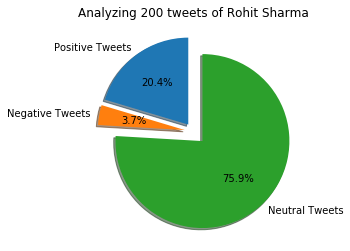



Positive tweets:
RT @Duchess_Of_Swag: Who is the BEST BATSMAN in Limited overs Cricket ?

RT for Virat Kohli
Like for Rohit Sharma

Ps : - don't cheat , res…
@ImRo45 @ritssajdeh Nice family sir rohit sharma ji
RT @Ro45FC: Most 100s by a Visiting Player

In Australia ~
5 - Rohit Sharma

In England ~
4 - Rohit Sharma

They called 'Home Track Bully'…
RT @harbhajan_singh: Rohit sharma what a player 🏏 brilliant 100 💪👍👌⭐️🔥 24th 100 for @ImRo45 keep going shaaaana
RT @ColdstoneIndia: Ready for some #CricMaster? Predict Rohit Sharma's total score  &amp; comment below. Lucky winners stand a chance to win Co…
RT @ahirhari03: Agree with Lara🙏 coz Rohit Sharma is World's Best Batsman 😎
https://t.co/wyKIPl5jwX
Tommorow is India vs Afganistan CWC 2019 match and I am very exited to watch rohit sharma in his full action again against Afganistan
RT @LoyalSachinFan: Kids are fighting for Rohit Sharma &amp; Virat Kohli,

Legends will fight for Mumbai Indians &amp; Chennai Super Kings.
RT @nithishreddy1

In [5]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
  
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'ATfKfmlU88EffYQzIF8SQhiYX'
        consumer_secret = 'dy8ao96WUqEFjEGi7dnIEiAT2Vq6EDDkXPOv0k50DcSr9dnwsz'
        access_token = '180739880-ncdWLjX4vDYfaCh1Foj2dltv6TNOPa31Nxb4zvXy'
        access_token_secret = '3vevh5nD8Z6IXlHn2XcrD7pnxtMVTZRbwu49rPLVRNW1n'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)",
                               " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    q = input("Enter a search query... ")
    n = int(input("Enter no. of tweets to analyze "))
    tweets = api.get_tweets(query = q, count = n) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %"
          .format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
  
    sizes = [len(ptweets),len(ntweets),len(tweets) - len(ntweets) - len(ptweets)]
    label = ['Positive Tweets','Negative Tweets','Neutral Tweets']
    explode = (0.1,0.1,0.15)
    plt.pie(sizes,explode=explode,labels=label,autopct='%.1f%%'
            ,shadow=True,startangle=90)
    plt.title(f"Analyzing {n} tweets of {q}")
    plt.show()
    
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 
  
if __name__ == "__main__": 
    # calling main function 
    main() 